In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


you can upload from here every **CSV file** 


In [28]:
url_Retail_product='RETAIL_PRODUCT.csv'
url_RETAIL_REGISTRY='RETAIL_REGISTRY.csv'
url_RETAIL_SALES='RETAIL_SALES.csv'
url_RETAIL_SALES_DETAIL='RETAIL_SALES_DETAIL.csv'

In [3]:
r_product = pd.read_csv(url_Retail_product,delimiter=';')
r_product.head()
print('Shape of the input data  rows {} '.format(r_product.shape))
r_product.head(20)


Shape of the input data  rows (2800, 3) 


,PRODUCT_ID,CATEGORY_ID,CATEGORY_DESC
0,92887,4,POULTRY
1,102017,1,OTHER_FROZEN
2,103710,3,READY-MADE
3,10184,7,FISH
4,10328,16,OTHER
5,4671,1,OTHER_FROZEN
6,17284,11,FRUIT
7,21439,1,OTHER_FROZEN
8,30005,11,FRUIT
9,116202,11,FRUIT


In [7]:
r_product_nulls=r_product.isnull().sum()
print(r_product_nulls)

PRODUCT_ID       0
CATEGORY_ID      0
CATEGORY_DESC    0
dtype: int64


In [4]:
r_registry =pd.read_csv(url_RETAIL_REGISTRY,delimiter=',')
r_registry.head()
print('Shape of the input data  rows {} '.format(r_registry.shape))


Shape of the input data  rows (25727, 4) 


In [7]:
r_registry['ORIGIN'].value_counts()
#len(r_registry['ORIGIN'].unique())

ORIGIN
WEB                  14506
STORE                 7910
PHONE                 3297
MEMBER_GET_MEMBER       14
Name: count, dtype: int64

In [8]:
r_registry['REGIONAL_CODE'].value_counts()

REGIONAL_CODE
30    1079
36    1032
13    1011
11     938
3      922
      ... 
79      19
82       9
81       9
74       7
80       5
Name: count, Length: 82, dtype: int64

REGIONAL_CODE
30    1079
36    1032
13    1011
11     938
3      922
      ... 
79      19
82       9
81       9
74       7
80       5
Name: count, Length: 82, dtype: int64


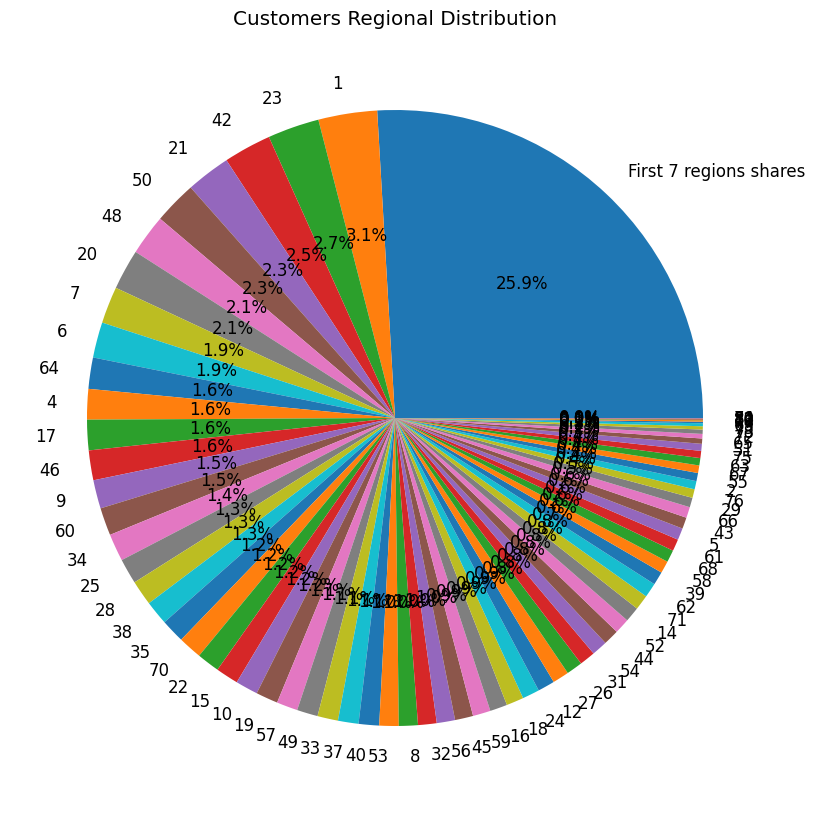

In [57]:
regional_code_counts = r_registry['REGIONAL_CODE'].value_counts()

# Merge the first 7 regional codes into one piece of pie
merged_counts = regional_code_counts[:7].sum()
merged_labels = ['First 7 regions shares'] + list(regional_code_counts.index[7:])
merged_sizes = [merged_counts] + list(regional_code_counts.values[7:])

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pie chart
plt.pie(merged_sizes, labels=merged_labels, autopct='%1.1f%%')

# Set the font size of the labels
plt.rcParams['font.size'] = 12

# Set the title
plt.title('Customers Regional Distribution')

# Show the chart
plt.show()


In [45]:
r_registry_nulls=r_registry.isnull().sum()
print(r_registry_nulls)
r_registry.head()
r_registry.shape

CUSTOMER_ID      0
CREATION_DATE    8
REGIONAL_CODE    0
ORIGIN           0
dtype: int64


(25727, 4)

In [44]:
customer_id_count = r_registry['CUSTOMER_ID'].nunique()
print("Number of unique customer IDs in the registry:", customer_id_count)


Number of unique customer IDs in the registry: 25727


In [43]:
r_registry.shape

(25727, 4)

In [47]:
r_sales =pd.read_csv(url_RETAIL_SALES,delimiter=';')
r_sales.head()
print('Shape of the input data  rows {} '.format(r_sales.shape))
r_sales.head()


Shape of the input data  rows (489967, 6) 


,CUSTOMER_ID,DATE,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS
0,AA00312188,2019-02-14,64,CASH,14:39:56,290.0
1,AA00312188,2019-02-28,64,CASH,14:19:14,155.0
2,AA00312188,2019-03-14,64,CASH,14:39:26,295.0
3,AA00312188,2018-09-27,64,CASH,14:53:44,115.0
4,AA00312188,2019-04-25,64,CASH,14:49:31,290.0


In [70]:
r_sales_nulls=r_sales.isnull().sum()
print(r_sales_nulls)

CUSTOMER_ID           0
DATE                  0
OUTLET_ID             0
PAYMENT_METHOD        0
TIME                  0
TOTAL_POINTS      21868
dtype: int64


In [48]:
unique_customer_ids = r_sales['CUSTOMER_ID'].nunique()
print("Number of unique customer IDs in r_sales:", unique_customer_ids)


Number of unique customer IDs in r_sales: 25728


In [71]:
r_sales.shape

(489967, 6)

In [6]:
r_sales_detail=pd.read_csv(url_RETAIL_SALES_DETAIL,delimiter=',')
print('Shape of the input data  rows {} '.format(r_sales_detail.shape))
#r_sales_detail.dropna(inplace=True)
#r_sales_detail.head()
#cantidad_nulos_por_columna = r_sales_detail.isnull().sum()
#print(cantidad_nulos_por_columna)
#print('Shape of the input data  rows {} '.format(r_sales_detail.shape))
r_sales_detail.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_15420\2657594517.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  r_sales_detail=pd.read_csv(url_RETAIL_SALES_DETAIL,delimiter=',')


Shape of the input data  rows (2047073, 6) 


,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN
1,BF00404312,2020-01-17,94580,1.0,6.25,NaN
2,BF00404312,2020-01-17,224046,1.0,4.95,NaN
3,BF00404312,2020-01-17,17284,1.0,5.25,NaN
4,BF00404312,2020-01-17,130905,1.0,5.95,NaN


In [52]:
unique_quantity_values = df['QUANTITY'].nunique()
print("Unique values of 'QUANTITY':", unique_quantity_values)


Unique values of 'QUANTITY': 0


In [7]:
#duplicated = r_sales_detail.duplicated(subset=['CUSTOMER_ID', 'DATE'])
#print(duplicated)
r_sales_detail = r_sales_detail.drop_duplicates(subset=['CUSTOMER_ID', 'DATE','PRODUCT_ID'])
r_sales_detail.shape

r_sales= r_sales.drop_duplicates(subset=['CUSTOMER_ID', 'DATE'])
#r_sales.shape
r_sales_detail.shape


(2032483, 6)

In [49]:
unique_customer_ids = r_sales_detail['CUSTOMER_ID'].nunique()
print("Number of unique customer IDs in r_sales_details:", unique_customer_ids)

Number of unique customer IDs in r_sales_details: 25728


### prova andrea without registry
---

In [8]:
sales_result = pd.merge(r_sales_detail, r_sales, on=['CUSTOMER_ID','DATE'], how='left')
df= pd.merge(sales_result, r_product, on='PRODUCT_ID', how='left')
print('Shape of the input data  rows {} '.format(df.shape))
df.head()

Shape of the input data  rows (2032483, 12) 


,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14.0,CASH,15:06:37,-3960.0,3.0,READY-MADE
1,BF00404312,2020-01-17,94580,1.0,6.25,NaN,14.0,CASH,15:06:37,-3960.0,7.0,FISH
2,BF00404312,2020-01-17,224046,1.0,4.95,NaN,14.0,CASH,15:06:37,-3960.0,11.0,FRUIT
3,BF00404312,2020-01-17,17284,1.0,5.25,NaN,14.0,CASH,15:06:37,-3960.0,11.0,FRUIT
4,BF00404312,2020-01-17,130905,1.0,5.95,NaN,14.0,CASH,15:06:37,-3960.0,11.0,FRUIT


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by StandardScaler.

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [61]:
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Create a scatter plot
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by PCA.

code of Tizi with registration

---

In [75]:
'''sales_result = pd.merge(r_sales_detail, r_sales, on=['CUSTOMER_ID','DATE'], how='left')
sales_result_2 = pd.merge(r_registry, sales_result, on='CUSTOMER_ID', how='left')
print('Shape of the input data  rows {} '.format(sales_result.shape))
sales_result_2.head()'''





"sales_result = pd.merge(r_sales_detail, r_sales, on=['CUSTOMER_ID','DATE'], how='left')\nsales_result_2 = pd.merge(r_registry, sales_result, on='CUSTOMER_ID', how='left')\nprint('Shape of the input data  rows {} '.format(sales_result.shape))\nsales_result_2.head()"

In [76]:
'''df= pd.merge(sales_result_2, r_product, on='PRODUCT_ID', how='left')
print('Shape of the input data  rows {} '.format(df.shape))
df.head()'''


"df= pd.merge(sales_result_2, r_product, on='PRODUCT_ID', how='left')\nprint('Shape of the input data  rows {} '.format(df.shape))\ndf.head()"

---

In [89]:
df_nulls=df.isnull().sum()
print(df_nulls)
nulos = df[df['PAYMENT_METHOD'].isnull()]

# Imprimir los valores nulos
print(nulos.head)

CUSTOMER_ID             0
DATE                    0
PRODUCT_ID              0
QUANTITY                0
LIST_PRICE          19904
SPECIAL           2028700
OUTLET_ID             703
PAYMENT_METHOD        703
TIME                  703
TOTAL_POINTS        54184
CATEGORY_ID          2458
CATEGORY_DESC        2458
dtype: int64
<bound method NDFrame.head of         CUSTOMER_ID        DATE  PRODUCT_ID  QUANTITY  LIST_PRICE SPECIAL  \
7356     UL00406668  2019-04-30      140527       1.0         5.0     NaN   
17387    JY00404738  2019-08-06        3687      -2.0       -11.9     NaN   
43488    PO04583871  2019-06-26      108504       1.0         0.0     NaN   
55426    AA00395109  2019-10-11        4335      -6.0       -27.0     NaN   
55427    AA00395109  2019-10-11      184876       1.0        27.0     NaN   
...             ...         ...         ...       ...         ...     ...   
2015270  CY02220414  2019-03-06      123867       1.0         0.0     NaN   
2018340  WJ00770604  2019-03-

In [90]:
uniques_value_pm = df['PAYMENT_METHOD'].unique()
print("Unique values", uniques_value_pm)

Unique values ['CASH' 'DEBIT CARD' 'CREDIT CARD' nan 'GIFT CARD' 'CHECK']


In [9]:
#df= df.drop('CUSTOMER_ID', axis = 1)
df= df.drop('CATEGORY_ID', axis = 1)
df= df.drop('PRODUCT_ID', axis = 1)
df.head() 

,CUSTOMER_ID,DATE,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_DESC
0,BF00404312,2020-01-17,1.0,6.85,NaN,14.0,CASH,15:06:37,-3960.0,READY-MADE
1,BF00404312,2020-01-17,1.0,6.25,NaN,14.0,CASH,15:06:37,-3960.0,FISH
2,BF00404312,2020-01-17,1.0,4.95,NaN,14.0,CASH,15:06:37,-3960.0,FRUIT
3,BF00404312,2020-01-17,1.0,5.25,NaN,14.0,CASH,15:06:37,-3960.0,FRUIT
4,BF00404312,2020-01-17,1.0,5.95,NaN,14.0,CASH,15:06:37,-3960.0,FRUIT


In [ ]:
df.shape

(2032475, 13)

categorical to numerical: payment method
|payment_method|PAYMENT_METHOD_NUMERIC|
|------------|:-----------:|
|'CASH'| 1|
|'DEBIT CARD'| 2|
|'CREDIT CARD'| 3| 
|'GIFT CARD'|4| 
|'CHECK'|5|

In [9]:
payment_method = {'CASH': 1, 'DEBIT CARD': 2, 'CREDIT CARD': 3, 'GIFT CARD':4, 'CHECK':5}
payment_method.update({None: 6})
df['PAYMENT_METHOD_NUMERIC'] = df['PAYMENT_METHOD'].map(payment_method)
df= df.drop('PAYMENT_METHOD', axis = 1)
df.head()



,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,PAYMENT_METHOD_NUMERIC
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14.0,15:06:37,-3960.0,3.0,READY-MADE,1.0
1,BF00404312,2020-01-17,94580,1.0,6.25,NaN,14.0,15:06:37,-3960.0,7.0,FISH,1.0
2,BF00404312,2020-01-17,224046,1.0,4.95,NaN,14.0,15:06:37,-3960.0,11.0,FRUIT,1.0
3,BF00404312,2020-01-17,17284,1.0,5.25,NaN,14.0,15:06:37,-3960.0,11.0,FRUIT,1.0
4,BF00404312,2020-01-17,130905,1.0,5.95,NaN,14.0,15:06:37,-3960.0,11.0,FRUIT,1.0


This code needs to run only for tizi merged dataframe $\downarrow$

In [ ]:
uniques_value_or = df['ORIGIN'].unique()
print("Unique values", uniques_value_or)

categorical to numerical data: ORIGIN feature
|ORIGIN|ORIGIN_NUMERIC|
|------------|:-----------:|
|'WEB'| 1|
|'PHONE'| 2|
|'STORE'| 3|
|'MEMBER_GET_MEMBER'|4|

In [10]:
Origin = {'WEB': 1, 'PHONE': 2, 'STORE': 3, 'MEMBER_GET_MEMBER':4}
df['ORIGIN_NUMERIC'] = df['ORIGIN'].map(Origin)
df= df.drop('ORIGIN', axis = 1)
df.head()

KeyError: 'ORIGIN'

In [ ]:
uniques_value_cd = df['CATEGORY_DESC'].unique()
print("Unique values", uniques_value_cd)

Unique values ['VEGETABLES' 'OTHER_FROZEN' 'POULTRY' 'READY-MADE' 'FISH' 'FRIES' 'FRUIT'
 'DRINKS' nan 'ACCESSORIES' 'OTHER' 'BEEF_PORK' 'SAUCE' 'GADGETS']


categorical to numerical for **product_ID**
|ORIGIN|ORIGIN_NUMERIC|
|------------|:-----------:|
|'VEGETABLES'| 1|
|'OTHER_FROZEN'| 2|
|'POULTRY'| 3|
|'READY-MADE'|4|
|'FISH'|5|
|'FRIES'|6|
|  'FRUIT'|7|
|  'DRINKS'|8|
|  'ACCESSORIES'|9|
|  'OTHER'|10|
|  'BEEF_PORK'|11|
|  'SAUCE'|12|
|  'GADGETS'|13|

In [11]:
Category = {'VEGETABLES': 1, 'OTHER_FROZEN': 2, 'POULTRY': 3, 'READY-MADE':4,'FISH':5,'FRIES':6,'FRUIT':7,'DRINKS':8,'ACCESSORIES':9,'OTHER':10,'BEEF_PORK':11,'SAUCE':12,'GADGETS':13}
Category.update({None: 14})
df['CATEGORY_DESC_NUMERIC'] = df['CATEGORY_DESC'].map(Category)
df= df.drop('CATEGORY_DESC', axis = 1)
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,TIME,TOTAL_POINTS,CATEGORY_ID,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14.0,15:06:37,-3960.0,3.0,1.0,4.0
1,BF00404312,2020-01-17,94580,1.0,6.25,NaN,14.0,15:06:37,-3960.0,7.0,1.0,5.0
2,BF00404312,2020-01-17,224046,1.0,4.95,NaN,14.0,15:06:37,-3960.0,11.0,1.0,7.0
3,BF00404312,2020-01-17,17284,1.0,5.25,NaN,14.0,15:06:37,-3960.0,11.0,1.0,7.0
4,BF00404312,2020-01-17,130905,1.0,5.95,NaN,14.0,15:06:37,-3960.0,11.0,1.0,7.0


In [12]:
Special_price = {'Y': 1}
Special_price.update({None: 0})
df['SPECIAL_NUMERIC'] = df['SPECIAL'].map(Special_price)
df= df.drop('SPECIAL', axis = 1)
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,CATEGORY_ID,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC
0,BF00404312,2020-01-17,1068,1.0,6.85,14.0,15:06:37,-3960.0,3.0,1.0,4.0,NaN
1,BF00404312,2020-01-17,94580,1.0,6.25,14.0,15:06:37,-3960.0,7.0,1.0,5.0,NaN
2,BF00404312,2020-01-17,224046,1.0,4.95,14.0,15:06:37,-3960.0,11.0,1.0,7.0,NaN
3,BF00404312,2020-01-17,17284,1.0,5.25,14.0,15:06:37,-3960.0,11.0,1.0,7.0,NaN
4,BF00404312,2020-01-17,130905,1.0,5.95,14.0,15:06:37,-3960.0,11.0,1.0,7.0,NaN


In [13]:
#The result of day of week gives numer. 0 is monday, 6 is Sunday.
df['DATE'] = pd.to_datetime(df['DATE'])
df['week_day'] = df['DATE'].dt.dayofweek
df.head()



,CUSTOMER_ID,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day
0,BF00404312,2020-01-17,1.0,6.85,14.0,15:06:37,-3960.0,1.0,4.0,NaN,4
1,BF00404312,2020-01-17,1.0,6.25,14.0,15:06:37,-3960.0,1.0,5.0,NaN,4
2,BF00404312,2020-01-17,1.0,4.95,14.0,15:06:37,-3960.0,1.0,7.0,NaN,4
3,BF00404312,2020-01-17,1.0,5.25,14.0,15:06:37,-3960.0,1.0,7.0,NaN,4
4,BF00404312,2020-01-17,1.0,5.95,14.0,15:06:37,-3960.0,1.0,7.0,NaN,4


Dropping ***NaN values***

In [14]:
uniques_value_wk = df['week_day'].unique()
print("Unique values", uniques_value_wk)

#Completo nulls
df['PAYMENT_METHOD_NUMERIC'] = df['PAYMENT_METHOD_NUMERIC'].fillna(6)
df['CATEGORY_DESC_NUMERIC'] = df['CATEGORY_DESC_NUMERIC'].fillna(14)
df['SPECIAL_NUMERIC'] = df['SPECIAL_NUMERIC'].fillna(0)
df['OUTLET_ID'] = df['OUTLET_ID'].fillna(0)
df_nulls=df.isnull().sum()
print(df_nulls)
nulos = df[df['week_day'].isnull()]




Unique values [4 5 1 2 3 6 0]
CUSTOMER_ID                   0
DATE                          0
QUANTITY                      0
LIST_PRICE                19904
OUTLET_ID                     0
TIME                        703
TOTAL_POINTS              54184
PAYMENT_METHOD_NUMERIC        0
CATEGORY_DESC_NUMERIC         0
SPECIAL_NUMERIC               0
week_day                      0
dtype: int64


In [16]:
min_purchase_date_by_customer = df.groupby('CUSTOMER_ID')['DATE'].min()


# Replace missing values in 'registration date' column with minimum purchase date for each customer
df['CREATION_DATE'] = df.groupby('CUSTOMER_ID')['DATE'].transform(lambda x: x.fillna(x.min()))


print(df_nulls)

CUSTOMER_ID                   0
DATE                          0
QUANTITY                      0
LIST_PRICE                19904
OUTLET_ID                     0
TIME                        703
TOTAL_POINTS              54184
PAYMENT_METHOD_NUMERIC        0
CATEGORY_DESC_NUMERIC         0
SPECIAL_NUMERIC               0
week_day                      0
dtype: int64


In [17]:
df['CREATION_DATE'] = pd.to_datetime(df['CREATION_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,CUSTOMER_ID,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day,CREATION_DATE
0,BF00404312,2020-01-17,1.0,6.85,14.0,15:06:37,-3960.0,1.0,4.0,0.0,4,2020-01-17
1,BF00404312,2020-01-17,1.0,6.25,14.0,15:06:37,-3960.0,1.0,5.0,0.0,4,2020-01-17
2,BF00404312,2020-01-17,1.0,4.95,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4,2020-01-17
3,BF00404312,2020-01-17,1.0,5.25,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4,2020-01-17
4,BF00404312,2020-01-17,1.0,5.95,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4,2020-01-17


In [ ]:
#CRinMonths = Customer Retention in Months
df['CRInMonths'] = (df['DATE'] - df['CREATION_DATE']).dt.days / 30.44
df.head()

,CUSTOMER_ID,CREATION_DATE,REGIONAL_CODE,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,ORIGIN_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day,CRInMonths
0,AA00312188,2019-05-23,11,2019-05-23,1.0,4.95,64.0,14:17:46,125.0,1.0,1,1.0,0.0,3,0.0
1,AA00312188,2019-05-23,11,2019-05-23,1.0,11.95,64.0,14:17:46,125.0,1.0,1,2.0,0.0,3,0.0
2,AA00312188,2019-08-01,11,2019-08-01,1.0,11.95,25.0,14:38:45,375.0,2.0,1,3.0,0.0,3,0.0
3,AA00312188,2019-08-01,11,2019-08-01,1.0,7.65,25.0,14:38:45,375.0,2.0,1,4.0,0.0,3,0.0
4,AA00312188,2019-08-01,11,2019-08-01,1.0,9.75,25.0,14:38:45,375.0,2.0,1,3.0,0.0,3,0.0


In [ ]:
df['CRInMonths'].round().astype(int)


0          0
1          0
2          0
3          0
4          0
          ..
2032470    0
2032471    0
2032472    0
2032473    0
2032474    0
Name: CRInMonths, Length: 2032475, dtype: int32

In [ ]:
print(df['CRInMonths'].describe())
count = '{:.0f}'.format(2.032475e+06)
mean = '{:.2f}'.format(1.185777e+02)
std = '{:.2f}'.format(6.504343e+01)
min_val = '{:.2f}'.format(2.299606e-01)
q1 = '{:.2f}'.format(5.995401e+01)
median = '{:.2f}'.format(1.171485e+02)
q3 = '{:.2f}'.format(1.794678e+02)
max_val = '{:.2f}'.format(2.287122e+02)


print("count:", count)
print("mean:", mean)
print("std:", std)
print("min:", min_val)
print("25%:", q1)
print("50%:", median)
print("75%:", q3)
print("max:", max_val)

count    2032475.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: CRInMonths, dtype: float64
count: 2032475
mean: 118.58
std: 65.04
min: 0.23
25%: 59.95
50%: 117.15
75%: 179.47
max: 228.71


In [ ]:
df.head()

,CUSTOMER_ID,CREATION_DATE,REGIONAL_CODE,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,ORIGIN_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day,CRInMonths
0,AA00312188,2019-05-23,11,2019-05-23,1.0,4.95,64.0,14:17:46,125.0,1.0,1,1.0,0.0,3,0.0
1,AA00312188,2019-05-23,11,2019-05-23,1.0,11.95,64.0,14:17:46,125.0,1.0,1,2.0,0.0,3,0.0
2,AA00312188,2019-08-01,11,2019-08-01,1.0,11.95,25.0,14:38:45,375.0,2.0,1,3.0,0.0,3,0.0
3,AA00312188,2019-08-01,11,2019-08-01,1.0,7.65,25.0,14:38:45,375.0,2.0,1,4.0,0.0,3,0.0
4,AA00312188,2019-08-01,11,2019-08-01,1.0,9.75,25.0,14:38:45,375.0,2.0,1,3.0,0.0,3,0.0


In [13]:
df = df.drop('CUSTOMER_ID', axis=1)

In [20]:
df.head()

,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day
0,2020-01-17,1.0,6.85,14.0,15:06:37,-3960.0,1.0,4.0,0.0,4
1,2020-01-17,1.0,6.25,14.0,15:06:37,-3960.0,1.0,5.0,0.0,4
2,2020-01-17,1.0,4.95,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4
3,2020-01-17,1.0,5.25,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4
4,2020-01-17,1.0,5.95,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4


Now let's check if the list prices with NAN values have corrispondent products ID

In [ ]:
nan_count = df['LIST_PRICE'].isnull().sum()
print("Number of NaN values in the list_price column:", nan_count)
df_nan_list_price = df[df['LIST_PRICE'].isnull()]
df_nan_list_price.head()

Number of NaN values in the list_price column: 19904


,CREATION_DATE,REGIONAL_CODE,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,ORIGIN_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day,CRInMonths
55,2018-10-11,11,2018-10-11,1.0,NaN,67.0,14:15:05,185.0,1.0,1,8.0,0.0,3,0.0
76,2018-12-09,11,2018-12-09,1.0,NaN,64.0,12:01:51,235.0,1.0,1,4.0,0.0,6,0.0
153,2019-01-26,42,2019-01-26,1.0,NaN,91.0,16:41:39,-560.0,1.0,1,8.0,0.0,5,0.0
481,2019-01-18,6,2019-01-18,3.0,NaN,7.0,19:40:11,-2015.0,1.0,1,9.0,0.0,4,0.0
1111,2019-02-20,25,2019-02-20,1.0,NaN,51.0,11:08:01,675.0,3.0,1,5.0,0.0,2,0.0


So we actually have a match between ***NAN values in list prices and product ID***(category_desc_numeric), so maybe we can interpolate the information back from the point seeing how they are given

---

this is to see if quantity=1000 is an ***outlier*** 

In [ ]:
count_values = df[df['QUANTITY'] ==1]['QUANTITY'].count()
print(f'how many values=1: {count_values}')
count_values1 = df[df['QUANTITY'] >999]['QUANTITY'].count()
print(f'how many values over 999: {count_values1}')

how many values=1: 1846824
how many values over 999: 1


In [ ]:
df1 = df.drop('TOTAL_POINTS', axis=1)

In [ ]:
df2 = df1.drop(df1[df1['QUANTITY'] > 50].index)


In [ ]:
df2['OUTLET_ID'] = df2['OUTLET_ID'].fillna(0)


Now lets check if the **outlet _ID rows with 0 values** correspond to the websites to evaluate if they're usuful for further analysis

In [ ]:
df_zero_outlet = df[df['OUTLET_ID'] == 0]
print(f'the number of rows  with outlet_id=0 is {df_zero_outlet.shape[0]}')
df_zero_outlet_origin = df_zero_outlet[df_zero_outlet['ORIGIN_NUMERIC'] == 1]
print(f'the number of rows  with outlet_id=0 with web origin is {df_zero_outlet_origin.shape[0]}')



the number of rows  with outlet_id=0 is 3514
the number of rows  with outlet_id=0 with web origin is 2541


So we can see that ORIGIN_ID=0 doesn't mean that is coming from web so they could be errors or simply missing information about the store

In [17]:
df = df.drop("PRODUCT_ID", axis=1)


<Axes: >

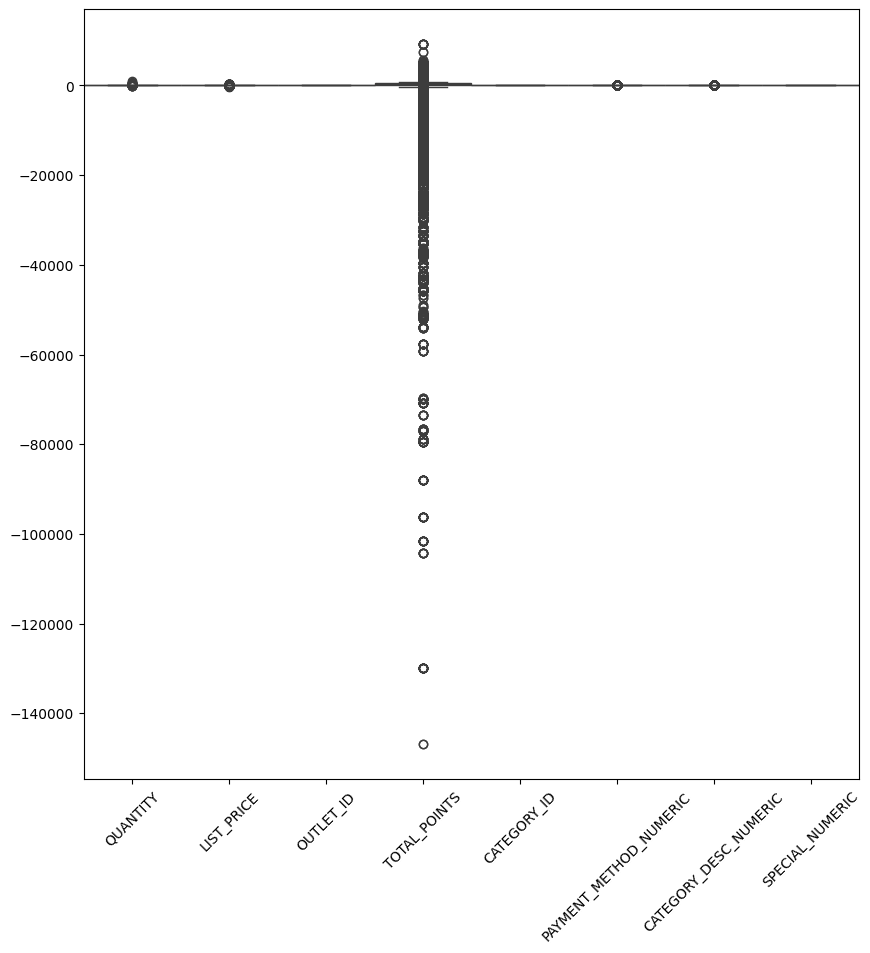

In [18]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
sns.boxplot(data=df,gap=3, width=0.5)

,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,CATEGORY_ID,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC


In [19]:
from scipy import stats

# Calculate z-scores for the columns
z_scores = stats.zscore(df[['TOTAL_POINTS', 'QUANTITY', 'LIST_PRICE']])

# Define a threshold for outlier detection (I choose 3 standard deviations)
threshold = 3

# Filter out rows with z-scores above the threshold
df = df[(np.abs(z_scores) < threshold).all(axis=1)]


In [26]:
df.head()

,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,CATEGORY_ID,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC


In [22]:
column_names = df.columns.tolist()
column_names = [f'{col}' for col in column_names]
print(column_names)

['DATE', 'QUANTITY', 'LIST_PRICE', 'OUTLET_ID', 'TIME', 'TOTAL_POINTS', 'CATEGORY_ID', 'PAYMENT_METHOD_NUMERIC', 'CATEGORY_DESC_NUMERIC', 'SPECIAL_NUMERIC']


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['DATE', 'QUANTITY', 'LIST_PRICE', 'OUTLET_ID', 'TIME', 'TOTAL_POINTS', 'CATEGORY_ID', 'PAYMENT_METHOD_NUMERIC', 'CATEGORY_DESC_NUMERIC', 'SPECIAL_NUMERIC']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by MinMaxScaler.

---

# First try with K-means

$\rightarrow$ We can try **bi-dimensional** dataframes with the correleted features tizi had found $\leftarrow$

In [101]:
df.head()

,DATE,QUANTITY,LIST_PRICE,OUTLET_ID,TIME,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day,CREATION_DATE
0,2020-01-17,1.0,6.85,14.0,15:06:37,-3960.0,1.0,4.0,0.0,4,2020-01-17
1,2020-01-17,1.0,6.25,14.0,15:06:37,-3960.0,1.0,5.0,0.0,4,2020-01-17
2,2020-01-17,1.0,4.95,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4,2020-01-17
3,2020-01-17,1.0,5.25,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4,2020-01-17
4,2020-01-17,1.0,5.95,14.0,15:06:37,-3960.0,1.0,7.0,0.0,4,2020-01-17


we can try to remove list price by having a tot quantity column= quantity*list price

In [ ]:
#df2 = df.drop(['DATE','LIST_PRICE','TIME','CREATION_DATE'], axis=1)

In [16]:
df2 = df.drop(['DATE','LIST_PRICE','TIME'], axis=1)

$\downarrow$ repeated code down because i forgot the run it before $\downarrow$

In [28]:
df2['OUTLET_ID'] = df2['OUTLET_ID'].fillna(0)
df2 = df2.drop(df[df['QUANTITY'] > 50].index)
df2 = df2.drop('TOTAL_POINTS', axis=1)

In [17]:
df2=df2.fillna(0)

In [22]:
df2.head()

,QUANTITY,OUTLET_ID,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,week_day,SPECIAL_NUMERIC
0,1.0,14.0,-3960.0,1.0,4.0,4,0.0
1,1.0,14.0,-3960.0,1.0,5.0,4,0.0
2,1.0,14.0,-3960.0,1.0,7.0,4,0.0
3,1.0,14.0,-3960.0,1.0,7.0,4,0.0
4,1.0,14.0,-3960.0,1.0,7.0,4,0.0


In [ ]:
#df3 = df2.drop(['CRInMonths','week_day'], axis=1)

Correlation map

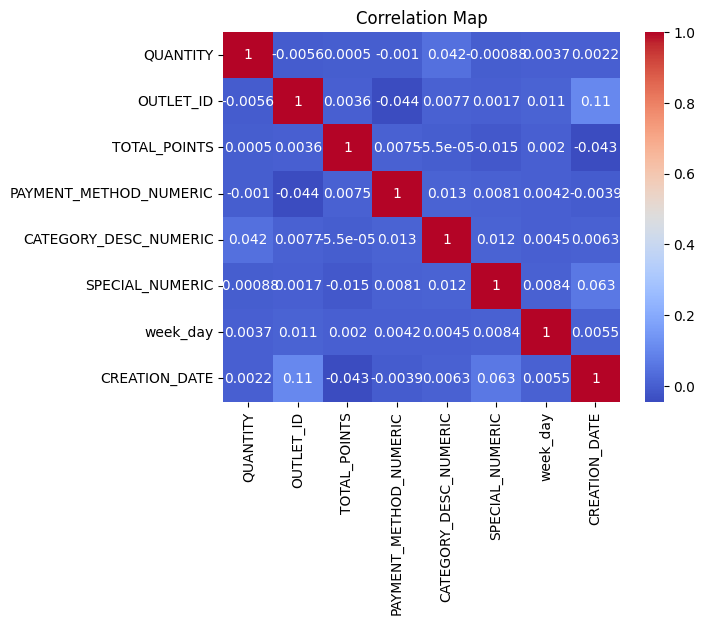

In [25]:
correlation = df2.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

In [106]:
unique_weekdays = df['week_day'].unique()
print(unique_weekdays)


[4 5 1 2 3 6 0]


To better compare features and have them to equally **contributed** to the clustering process, we will proceed to normalize the dataframe with ***minmax scaler***

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['QUANTITY', 'OUTLET_ID', 'TOTAL_POINTS', 'PAYMENT_METHOD_NUMERIC', 'CATEGORY_DESC_NUMERIC', 'SPECIAL_NUMERIC', 'week_day']
df2[columns_to_normalize] = scaler.fit_transform(df2[columns_to_normalize])


In [19]:
df2.head()

,QUANTITY,OUTLET_ID,TOTAL_POINTS,PAYMENT_METHOD_NUMERIC,CATEGORY_DESC_NUMERIC,SPECIAL_NUMERIC,week_day
0,0.046756,0.099291,0.91582,0.0,0.230769,0.0,0.666667
1,0.046756,0.099291,0.91582,0.0,0.307692,0.0,0.666667
2,0.046756,0.099291,0.91582,0.0,0.461538,0.0,0.666667
3,0.046756,0.099291,0.91582,0.0,0.461538,0.0,0.666667
4,0.046756,0.099291,0.91582,0.0,0.461538,0.0,0.666667


In [20]:
X=df2

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits import mplot3d
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings("ignore")

random_state = 11 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

In [ ]:
k_range = list(range(2,5)) # set the range of k values to test 
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))
inertias_km = []
silhouette_scores_km = []
for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)
    y_km = km.fit_predict(X)
    inertias_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X,y_km))

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.02, min_samples=12)
y_db = db.fit_predict(X)


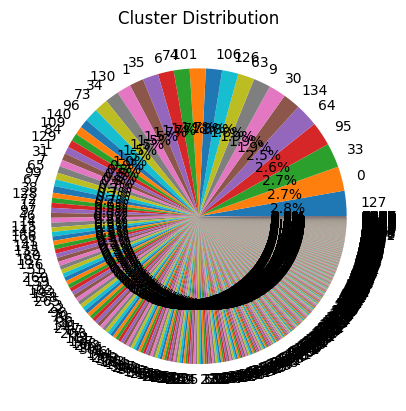

<Figure size 2000x2000 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

# Count the number of samples in each cluster
cluster_counts = pd.Series(y_db).value_counts()

# Plot the cluster distribution in a pie chart
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title('Cluster Distribution')
plt.figure(figsize=(20, 20))
plt.show()


Plot with seaborn

In [29]:
import seaborn as sns
df_clusters = pd.DataFrame({'Cluster': y_db})
df_with_clusters = pd.concat([X, df_clusters], axis=1)
sns.pairplot(df_with_clusters, hue='Cluster')


Probably we need to do **parameter grid** to fine tuning parameters